# The Battle of Neighborhoods
### Finding the best neighborhood for opening an Arts & Crafts store in London using Data Science

#### Import some libraries

In [1]:
import requests
from bs4 import BeautifulSoup
import lxml
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import numpy as np
import re

#### Read the Wikipedia page containing the list of boroughs in London

In [2]:
# Download the wikipedia page containing the list of areas of London, raise error if unsuccessful
wikiPage = requests.get('https://en.wikipedia.org/wiki/List_of_London_boroughs')
wikiPage.raise_for_status()

# Extract the table 
wikiSoup = BeautifulSoup(wikiPage.text)  #create soup from html text
table1 = wikiSoup.select('table')[0]  #get the second table as a 'tag' element object
df1 = pd.read_html(str(table1))[0]  #get the first dataframe (there's only 1)
df1.head(5)

,Borough,Inner,Status,Local authority,Political control,Headquarters,Area (sq mi),Population (2013 est)[1],Co-ordinates,Nr. in map
0,Barking and Dagenham [note 1],NaN,NaN,Barking and Dagenham London Borough Council,Labour,"Town Hall, 1 Town Square",13.93,194352,51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E,25
1,Barnet,NaN,NaN,Barnet London Borough Council,Conservative,"Barnet House, 2 Bristol Avenue, Colindale",33.49,369088,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W,31
2,Bexley,NaN,NaN,Bexley London Borough Council,Conservative,"Civic Offices, 2 Watling Street",23.38,236687,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E,23
3,Brent,NaN,NaN,Brent London Borough Council,Labour,"Brent Civic Centre, Engineers Way",16.70,317264,51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W,12
4,Bromley,NaN,NaN,Bromley London Borough Council,Conservative,"Civic Centre, Stockwell Close",57.97,317899,51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E,20


In [3]:
df1.shape

(32, 10)

In [4]:
# Extract the table 
table2 = wikiSoup.select('table')[1]  #get the second table as a 'tag' element object
df2 = pd.read_html(str(table2))[0]  #get the first dataframe (there's only 1)
df2.head(5)

,Borough,Inner,Status,Local authority,Political control,Headquarters,Area (sq mi),Population(2011 est),Co-ordinates,Nr. inmap
0,City of London,([note 5],Sui generis;City;Ceremonial county,Corporation of London;Inner Temple;Middle Temple,?,Guildhall,1.12,7000,51°30′56″N 0°05′32″W﻿ / ﻿51.5155°N 0.0922°W,1


In [5]:
df2.shape

(1, 10)

In [6]:
df_total = df1.append(df2, ignore_index = True)
df_total.head()

,Borough,Inner,Status,Local authority,Political control,Headquarters,Area (sq mi),Population (2013 est)[1],Co-ordinates,Nr. in map,Population(2011 est),Nr. inmap
0,Barking and Dagenham [note 1],NaN,NaN,Barking and Dagenham London Borough Council,Labour,"Town Hall, 1 Town Square",13.93,194352.0,51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E,25.0,NaN,NaN
1,Barnet,NaN,NaN,Barnet London Borough Council,Conservative,"Barnet House, 2 Bristol Avenue, Colindale",33.49,369088.0,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W,31.0,NaN,NaN
2,Bexley,NaN,NaN,Bexley London Borough Council,Conservative,"Civic Offices, 2 Watling Street",23.38,236687.0,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E,23.0,NaN,NaN
3,Brent,NaN,NaN,Brent London Borough Council,Labour,"Brent Civic Centre, Engineers Way",16.70,317264.0,51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W,12.0,NaN,NaN
4,Bromley,NaN,NaN,Bromley London Borough Council,Conservative,"Civic Centre, Stockwell Close",57.97,317899.0,51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E,20.0,NaN,NaN


#### Retrieve latitude and longitude for each Borough of London

In [7]:
def getLatitude(coordinates):
    lat, lon = re.sub('[^\w,. ]', '', coordinates.split("/")[1].strip()).split(" ")
    return (float(lat[:-1]) if (lat[-1] == "N") else - float(lat[:-1]))
    
def getLongitude(coordinates):
    lat, lon = re.sub('[^\w,. ]', '', coordinates.split("/")[1].strip()).split(" ")
    return (float(lon[:-1]) if (lon[-1] == "E") else - float(lon[:-1]))

In [8]:
df_total['Latitude'] = df_total["Co-ordinates"].apply(getLatitude)
df_total['Longitude'] = df_total["Co-ordinates"].apply(getLongitude)

In [9]:
df_total.head(5)

,Borough,Inner,Status,Local authority,Political control,Headquarters,Area (sq mi),Population (2013 est)[1],Co-ordinates,Nr. in map,Population(2011 est),Nr. inmap,Latitude,Longitude
0,Barking and Dagenham [note 1],NaN,NaN,Barking and Dagenham London Borough Council,Labour,"Town Hall, 1 Town Square",13.93,194352.0,51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E,25.0,NaN,NaN,51.5607,0.1557
1,Barnet,NaN,NaN,Barnet London Borough Council,Conservative,"Barnet House, 2 Bristol Avenue, Colindale",33.49,369088.0,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W,31.0,NaN,NaN,51.6252,-0.1517
2,Bexley,NaN,NaN,Bexley London Borough Council,Conservative,"Civic Offices, 2 Watling Street",23.38,236687.0,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E,23.0,NaN,NaN,51.4549,0.1505
3,Brent,NaN,NaN,Brent London Borough Council,Labour,"Brent Civic Centre, Engineers Way",16.70,317264.0,51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W,12.0,NaN,NaN,51.5588,-0.2817
4,Bromley,NaN,NaN,Bromley London Borough Council,Conservative,"Civic Centre, Stockwell Close",57.97,317899.0,51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E,20.0,NaN,NaN,51.4039,0.0198


#### Dataframe cleansing

1. We drop all the unnecessary columns in the DataFrame
2. We get rid of notes and comments in the Wikipedia table

In [10]:
# Remove unnecessary columns
London_borough_df = df_total.drop(df_total.iloc[:, 1:12], axis = 1)

# Remove notes and alternatives names of areas
London_borough_df.replace(r'\[.*?\]', '', regex = True, inplace = True)
London_borough_df.replace(r'\(.*?\)', '', regex = True, inplace = True)
London_borough_df['Borough'] = London_borough_df["Borough"].str.strip()
London_borough_df.head()

,Borough,Latitude,Longitude
0,Barking and Dagenham,51.5607,0.1557
1,Barnet,51.6252,-0.1517
2,Bexley,51.4549,0.1505
3,Brent,51.5588,-0.2817
4,Bromley,51.4039,0.0198


#### Read the Excel file containing the popolution projection for each London Borough for year 2020

In [11]:
population_data = pd.read_excel('london-borough-population.xlsx')
population_data = population_data.rename(columns = {"Area name": "Borough"})
population_data.head()

,Borough,Population Projections (2020)
0,City of London,9400
1,Barking and Dagenham,218800
2,Barnet,403000
3,Bexley,247100
4,Brent,342400


In [12]:
London_borough_df = London_borough_df.merge(population_data, on = 'Borough').reset_index(drop = True)
London_borough_df.head()

,Borough,Latitude,Longitude,Population Projections (2020)
0,Barking and Dagenham,51.5607,0.1557,218800
1,Barnet,51.6252,-0.1517,403000
2,Bexley,51.4549,0.1505,247100
3,Brent,51.5588,-0.2817,342400
4,Bromley,51.4039,0.0198,332000


#### Let's see how many boroughs (areas) are in London

In [13]:
print('London has {} boroughs. We considered The city as one of the London boroughs'.format(
        len(London_borough_df['Borough'])
    )
)

London has 33 boroughs. We considered The city as one of the London boroughs


### Explore the boroughs of London

#### First, we download all the packages that we will need

In [14]:
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

from pandas import json_normalize # tranform JSON file into a pandas dataframe

# import k-means from clustering stage
# from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

#### We use geopy library to get the latitude and longitude values of London

In [15]:
address = 'London, UK'

geolocator = Nominatim(user_agent="LO_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of London are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of London are 51.5073219, -0.1276474.


#### Load the SHP file representing the boundaries of each London borough

In [16]:
import geopandas
borough_boundaries_gdf = geopandas.read_file("London_Borough_Excluding_MHW.shp")
borough_boundaries_gdf.head()

,NAME,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry
0,Kingston upon Thames,E09000021,3726.117,0.000,F,None,None,"POLYGON ((516401.600 160201.800, 516407.300 16..."
1,Croydon,E09000008,8649.441,0.000,F,None,None,"POLYGON ((535009.200 159504.700, 535005.500 15..."
2,Bromley,E09000006,15013.487,0.000,F,None,None,"POLYGON ((540373.600 157530.400, 540361.200 15..."
3,Hounslow,E09000018,5658.541,60.755,F,None,None,"POLYGON ((521975.800 178100.000, 521967.700 17..."
4,Ealing,E09000009,5554.428,0.000,F,None,None,"POLYGON ((510253.500 182881.600, 510249.900 18..."


#### Get the current Coordinate Reference System of the SHP file

In [17]:
borough_boundaries_gdf.crs

<Projected CRS: PROJCS["OSGB 1936 / British National Grid",GEOGCS[ ...>
Name: OSGB 1936 / British National Grid
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Transverse Mercator
Datum: OSGB 1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

#### Change the Coordinate Reference System of the SHP file from OSGB 1936 to WGS84 and plot the map

<AxesSubplot:>

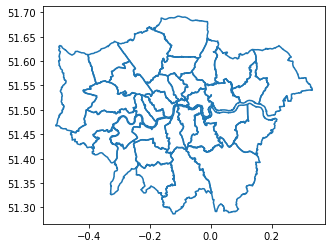

In [18]:
borough_boundaries_gdf = borough_boundaries_gdf.to_crs("WGS84")
borough_boundaries_gdf.boundary.plot()

#### Create a map of London with borough superimposed on top

In [19]:
# Create a map of London
map_london = folium.Map(location = [latitude, longitude], zoom_start = 10)

        
# Add borough boundaries to the London map
gjson = borough_boundaries_gdf.to_json()
polygons = folium.features.GeoJson(gjson)
map_london.add_child(polygons)

# Add borough markers to the London map
for lat, long, bor in zip(London_borough_df['Latitude'], London_borough_df['Longitude'], 
                                 London_borough_df['Borough']):
    label = '{}'.format(bor)
    label = folium.Popup(label, parse_html = True)
    folium.CircleMarker(
        [lat, long],
        radius = 7, 
        popup = label,
        color = 'red',
        fill = True,
        fill_color = 'white',
        fill_opacity = 0.7,
        parse_html = False).add_to(map_london)

map_london

#### We list all the venue categories we are interested into

We retrieved from Foursquare documentaion (https://developer.foursquare.com/docs/build-with-foursquare/categories/) all the categories we are interested into, and put them in a DataFrame

In [20]:
# List of venue categories to search for (extracted from https://developer.foursquare.com/docs/build-with-foursquare/categories/)
categoryIDs = {
    'Art Gallery': '4bf58dd8d48988d1e2931735', 
    'Art Museum': '4bf58dd8d48988d18f941735', 
    'College Arts Building': '4bf58dd8d48988d199941735', 
    'Art Studio': '58daa1558bbb0b01f18ec1d6', 
    'Arts & Crafts Store': '4bf58dd8d48988d127951735'
    }

#### Define Foursquare Credentials and Version

In [21]:
CLIENT_ID = '' # your Foursquare ID
CLIENT_SECRET = '' # your Foursquare Secret
VERSION = '' # Foursquare API version

Before we proceed, we define a function to extract the category of the venue.

In [22]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

#### Now, we get all venues in London with the categoryID we previously identified and put them in a Pandas DataFrame

In [23]:
# define the DataFrame where the results will be stored
London_venues_df = pd.DataFrame()

LIMIT = 1000 # limit of number of venues returned by Foursquare API
URL = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, VERSION, LIMIT)
CITY = 'London, UK'

for category_name, category_id in categoryIDs.items():
    # Retrieve the venues from Foursquare for each categoryID
    query = requests.get("{url}&near={city}&categoryId={category_id}".format(url = URL, city = CITY, category_id = category_id))
    if query.status_code == 200:
        results = query.json()
        venues = results["response"]['venues']
    
        venues = json_normalize(venues) # flatten JSON

        # filter columns
        filtered_columns = ['name', 'categories', 'location.lat', 'location.lng']
        venues = venues.loc[:, filtered_columns]

        # filter the category for each row
        venues['categories'] = venues.apply(get_category_type, axis=1)

        # clean columns
        venues.columns = [col.split(".")[-1] for col in venues.columns]

    London_venues_df = London_venues_df.append(venues, ignore_index = True) 

London_venues_df.columns = ['Venue', 'Category', 'Venue_Latitude', 'Venue_Longitude']
London_venues_df.head()

,Venue,Category,Venue_Latitude,Venue_Longitude
0,National Portrait Gallery,Art Gallery,51.509438,-0.128032
1,Nicolaes Maes,Art Gallery,51.508853,-0.128864
2,Magus & the Fool - Art Café,Coffee Shop,51.531153,-0.039047
3,Andy Warhol,Art Gallery,51.507869,-0.099663
4,LV21 Lightship,Art Gallery,51.444940,0.370789


In [24]:
London_venues_df.shape

(229, 4)

#### Assign each venue to the borough it is located in and drops the ones not belonging to any borough

In [25]:
from shapely.geometry import Point

# Given the geographical coordinates of each venue check in which borough it is in
venue_borough = []
for row in London_venues_df.itertuples():
    pt = Point(row.Venue_Longitude, row.Venue_Latitude)
    a = borough_boundaries_gdf[borough_boundaries_gdf.contains(pt)]['NAME'].values
    if (a.size > 0):
        venue_borough.append(a[0])
    else:
        venue_borough.append('')

London_venues_df['Borough'] = pd.DataFrame(venue_borough)

# Drop any row where borough is an empty string, i.e. when that particular venue is not located inside any of London borough
London_venues_df = London_venues_df[London_venues_df.Borough != '']

London_venues_df.head()

,Venue,Category,Venue_Latitude,Venue_Longitude,Borough
0,National Portrait Gallery,Art Gallery,51.509438,-0.128032,Westminster
1,Nicolaes Maes,Art Gallery,51.508853,-0.128864,Westminster
2,Magus & the Fool - Art Café,Coffee Shop,51.531153,-0.039047,Tower Hamlets
3,Andy Warhol,Art Gallery,51.507869,-0.099663,Southwark
5,Pitzhanger Manor Gallery & House,Art Gallery,51.511170,-0.306750,Ealing


In [26]:
print('We found {} venues.'.format(
        len(pd.unique(London_venues_df['Venue']))
    )
)

We found 189 venues.


In [27]:
print('All venues are located in {} boroughs.'.format(
        len(pd.unique(London_venues_df['Borough']))
    )
)

All venues are located in 28 boroughs.


#### Analyze each borough's venues

In the resulting DataFrame, London_venues_df, each row will represent a venue with some of its properties: name, category, latitude and longitude, London borough in which it is located.
This format is not appropriate for our needs, so we’ll have to transform it into a new DataFrame where each row will be a London borough, and each column the mean of venues in that borough for each category. The transformation will consist of performing a one-hot encoding and grouping the results by borough.

In [28]:
# One-hot encoding
London_onehot = pd.get_dummies(London_venues_df['Category'], prefix = "", prefix_sep = "")

# Add borough column back to dataframe
London_onehot['Borough'] = London_venues_df['Borough'] 

# Move neighborhood column to the first column
fixed_columns = [London_onehot.columns[-1]] + list(London_onehot.columns[:-1])
London_onehot = London_onehot[fixed_columns]

In [29]:
London_venues_grouped = London_onehot.groupby('Borough').sum().reset_index()
London_venues_grouped.head(33)

,Borough,Adult Education Center,Art Gallery,Art Museum,Art Studio,Arts & Crafts Store,Bar,Bike Shop,Coffee Shop,College Academic Building,College Arts Building,Coworking Space,Design Studio,Discount Store,Event Space,Fabric Shop,Frame Store,General College & University,General Entertainment,History Museum,Knitting Store,Museum,Performing Arts Venue,Print Shop,Pub,Stationery Store,Street Art,University
0,Barnet,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Brent,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Bromley,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Camden,1,3,3,2,1,1,0,0,0,7,0,0,0,0,0,0,0,0,2,0,0,0,0,0,3,1,1
4,City of London,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
5,Croydon,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,Ealing,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,Enfield,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,Greenwich,0,3,0,1,1,0,0,0,0,1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,Hackney,0,3,2,3,4,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Next, let's group rows by borough and by taking the mean of the frequency of occurrence of each category.

In [30]:
# Group by borough
London_grouped = London_onehot.groupby('Borough').mean().reset_index()

# Show the final DataFrame
print(London_grouped.shape)
London_grouped.head()

(28, 28)


,Borough,Adult Education Center,Art Gallery,Art Museum,Art Studio,Arts & Crafts Store,Bar,Bike Shop,Coffee Shop,College Academic Building,College Arts Building,Coworking Space,Design Studio,Discount Store,Event Space,Fabric Shop,Frame Store,General College & University,General Entertainment,History Museum,Knitting Store,Museum,Performing Arts Venue,Print Shop,Pub,Stationery Store,Street Art,University
0,Barnet,0.00,0.00,0.333333,0.00,0.00,0.00,0.0,0.0,0.0,0.333333,0.0,0.0,0.333333,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00
1,Brent,0.00,0.00,0.000000,1.00,0.00,0.00,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00
2,Bromley,0.00,0.00,0.000000,0.00,1.00,0.00,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00
3,Camden,0.04,0.12,0.120000,0.08,0.04,0.04,0.0,0.0,0.0,0.280000,0.0,0.0,0.000000,0.0,0.0,0.00,0.0,0.0,0.08,0.0,0.0,0.00,0.0,0.0,0.12,0.04,0.04
4,City of London,0.00,0.00,0.000000,0.00,0.00,0.00,0.0,0.0,0.0,0.250000,0.0,0.0,0.000000,0.0,0.0,0.25,0.0,0.0,0.00,0.0,0.0,0.25,0.0,0.0,0.25,0.00,0.00


#### Print each neighborhood along with the top 5 most common venues


In [31]:
num_top_venues = 5

for hood in London_grouped['Borough']:
    print("----"+hood+"----")
    temp = London_grouped[London_grouped['Borough'] == hood].T.reset_index()
    temp.columns = ['venue', 'freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending = False).reset_index(drop = True).head(num_top_venues))
    print('\n')

----Barnet----
                    venue  freq
0              Art Museum  0.33
1   College Arts Building  0.33
2          Discount Store  0.33
3  Adult Education Center  0.00
4             Frame Store  0.00


----Brent----
                    venue  freq
0              Art Studio   1.0
1  Adult Education Center   0.0
2             Fabric Shop   0.0
3              Street Art   0.0
4        Stationery Store   0.0


----Bromley----
                    venue  freq
0     Arts & Crafts Store   1.0
1  Adult Education Center   0.0
2             Fabric Shop   0.0
3              Street Art   0.0
4        Stationery Store   0.0


----Camden----
                   venue  freq
0  College Arts Building  0.28
1             Art Museum  0.12
2       Stationery Store  0.12
3            Art Gallery  0.12
4             Art Studio  0.08


----City of London----
                    venue  freq
0        Stationery Store  0.25
1   Performing Arts Venue  0.25
2   College Arts Building  0.25
3             Frame

#### Put top venues information into a _pandas_ dataframe

In [32]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending = False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each borough.

In [33]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Borough']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind + 1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind + 1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns = columns)
neighborhoods_venues_sorted['Borough'] = London_grouped['Borough']

for ind in np.arange(London_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(London_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Barnet,Discount Store,Art Museum,College Arts Building,University,Art Gallery,Art Studio,Arts & Crafts Store,Bar,Bike Shop,Coffee Shop
1,Brent,Art Studio,University,Discount Store,Art Gallery,Art Museum,Arts & Crafts Store,Bar,Bike Shop,Coffee Shop,College Academic Building
2,Bromley,Arts & Crafts Store,University,Discount Store,Art Gallery,Art Museum,Art Studio,Bar,Bike Shop,Coffee Shop,College Academic Building
3,Camden,College Arts Building,Stationery Store,Art Gallery,Art Museum,Art Studio,History Museum,University,Street Art,Arts & Crafts Store,Bar
4,City of London,Stationery Store,Performing Arts Venue,Frame Store,College Arts Building,University,Design Studio,Art Gallery,Art Museum,Art Studio,Arts & Crafts Store


In [34]:
neighborhoods_venues_sorted.shape

(28, 11)

## Cluster boroughs of London

In [35]:
# import k-means from clustering stage
from sklearn.cluster import KMeans

London_grouped_clustering = London_grouped.drop('Borough', 1)

In [36]:
def get_inertia(n_clusters):
    km = KMeans(n_clusters = n_clusters, random_state = 0).fit(London_grouped_clustering)
    return km.inertia_

In [37]:
scores = [get_inertia(x) for x in range(2, 15)]

Text(0, 0.5, 'Error')

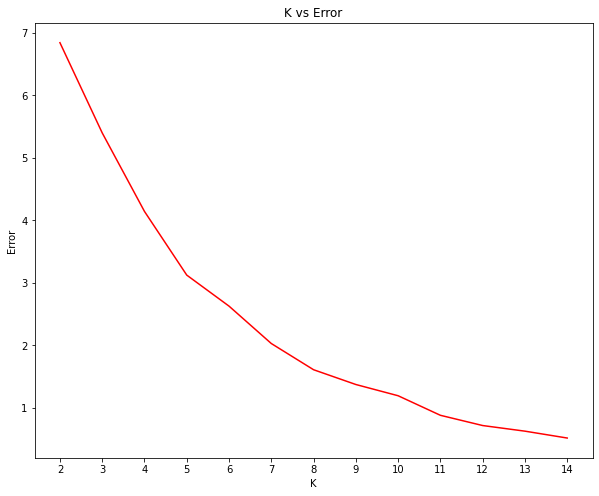

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = [10, 8])
sns.lineplot(x = range(2, 15), y = scores, color = 'r')
plt.title("K vs Error")
plt.xticks(range(2, 15))
plt.xlabel("K")
plt.ylabel("Error")

In [39]:
# Set number of clusters
kclusters = 6

# Run k-means clustering
kmeans = KMeans(n_clusters = kclusters, random_state = 0).fit(London_grouped_clustering)

# Check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([2, 0, 5, 2, 2, 0, 1, 0, 1, 2])

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each borough.

In [40]:
# Add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

London_merged = London_borough_df.merge(neighborhoods_venues_sorted, on = 'Borough').reset_index(drop = True)

print(London_merged.shape)
London_merged.head()

(28, 15)


,Borough,Latitude,Longitude,Population Projections (2020),Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Barnet,51.6252,-0.1517,403000,2,Discount Store,Art Museum,College Arts Building,University,Art Gallery,Art Studio,Arts & Crafts Store,Bar,Bike Shop,Coffee Shop
1,Brent,51.5588,-0.2817,342400,0,Art Studio,University,Discount Store,Art Gallery,Art Museum,Arts & Crafts Store,Bar,Bike Shop,Coffee Shop,College Academic Building
2,Bromley,51.4039,0.0198,332000,5,Arts & Crafts Store,University,Discount Store,Art Gallery,Art Museum,Art Studio,Bar,Bike Shop,Coffee Shop,College Academic Building
3,Camden,51.5290,-0.1255,248400,2,College Arts Building,Stationery Store,Art Gallery,Art Museum,Art Studio,History Museum,University,Street Art,Arts & Crafts Store,Bar
4,Croydon,51.3714,-0.0977,395600,0,Art Studio,University,Discount Store,Art Gallery,Art Museum,Arts & Crafts Store,Bar,Bike Shop,Coffee Shop,College Academic Building


Finally, let's visualize the resulting clusters.

In [41]:
# create map
map_clusters = folium.Map(location = [latitude, longitude], zoom_start = 11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(London_merged['Latitude'], London_merged['Longitude'], London_merged['Borough'], London_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html = True)
    folium.CircleMarker(
        [lat, lon],
        radius = 5,
        popup = label,
        color = rainbow[cluster - 1],
        fill = True,
        fill_color = rainbow[cluster - 1],
        fill_opacity = 0.7).add_to(map_clusters)
       
map_clusters

#### Examine Clusters


##### Cluster 1


In [42]:
London_merged.loc[London_merged['Cluster Labels'] == 0, London_merged.columns[list(range(3, London_merged.shape[1]))]]

,Population Projections (2020),Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,342400,0,Art Studio,University,Discount Store,Art Gallery,Art Museum,Arts & Crafts Store,Bar,Bike Shop,Coffee Shop,College Academic Building
4,395600,0,Art Studio,University,Discount Store,Art Gallery,Art Museum,Arts & Crafts Store,Bar,Bike Shop,Coffee Shop,College Academic Building
6,339200,0,Art Studio,University,Discount Store,Art Gallery,Art Museum,Arts & Crafts Store,Bar,Bike Shop,Coffee Shop,College Academic Building


##### Cluster 2


In [43]:
London_merged.loc[London_merged['Cluster Labels'] == 1, London_merged.columns[list(range(3, London_merged.shape[1]))]]

,Population Projections (2020),Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,360900,1,Art Gallery,Arts & Crafts Store,College Arts Building,University,Discount Store,Art Museum,Art Studio,Bar,Bike Shop,Coffee Shop
7,296000,1,Art Gallery,Discount Store,Art Studio,Arts & Crafts Store,College Arts Building,University,Art Museum,Bar,Bike Shop,Coffee Shop
11,262500,1,Arts & Crafts Store,College Arts Building,University,Discount Store,Art Gallery,Art Museum,Art Studio,Bar,Bike Shop,Coffee Shop
16,339200,1,Art Gallery,Arts & Crafts Store,College Arts Building,Museum,University,Discount Store,Art Museum,Art Studio,Bar,Bike Shop
24,282300,1,Art Gallery,Arts & Crafts Store,Art Museum,College Arts Building,University,Discount Store,Art Studio,Bar,Bike Shop,Coffee Shop


##### Cluster 3


In [44]:
London_merged.loc[London_merged['Cluster Labels'] == 2, London_merged.columns[list(range(3, London_merged.shape[1]))]]

,Population Projections (2020),Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,403000,2,Discount Store,Art Museum,College Arts Building,University,Art Gallery,Art Studio,Arts & Crafts Store,Bar,Bike Shop,Coffee Shop
3,248400,2,College Arts Building,Stationery Store,Art Gallery,Art Museum,Art Studio,History Museum,University,Street Art,Arts & Crafts Store,Bar
8,284400,2,Arts & Crafts Store,Art Gallery,Art Studio,Art Museum,Bike Shop,Coworking Space,University,Discount Store,Bar,Coffee Shop
12,305600,2,Art Studio,College Arts Building,University,Discount Store,Art Gallery,Art Museum,Arts & Crafts Store,Bar,Bike Shop,Coffee Shop
15,160600,2,Art Museum,College Arts Building,Art Gallery,Art Studio,Museum,Design Studio,University,Discount Store,Arts & Crafts Store,Bar
18,211200,2,Art Studio,Arts & Crafts Store,College Arts Building,University,Discount Store,Art Gallery,Art Museum,Bar,Bike Shop,Coffee Shop
19,358100,2,Stationery Store,General Entertainment,University,Design Studio,Art Gallery,Art Museum,Art Studio,Arts & Crafts Store,Bar,Bike Shop
21,199400,2,Art Studio,Art Gallery,Knitting Store,College Arts Building,University,Discount Store,Art Museum,Arts & Crafts Store,Bar,Bike Shop
22,329000,2,Art Gallery,Art Museum,Art Studio,College Arts Building,General Entertainment,University,Discount Store,Arts & Crafts Store,Bar,Bike Shop
23,331000,2,Art Gallery,College Arts Building,Art Studio,Art Museum,Pub,Print Shop,Coffee Shop,College Academic Building,University,Design Studio


##### Cluster 4


In [45]:
London_merged.loc[London_merged['Cluster Labels'] == 3, London_merged.columns[list(range(3, London_merged.shape[1]))]]

,Population Projections (2020),Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
20,313800,3,Discount Store,University,Art Gallery,Art Museum,Art Studio,Arts & Crafts Store,Bar,Bike Shop,Coffee Shop,College Academic Building


##### Cluster 5

In [46]:
London_merged.loc[London_merged['Cluster Labels'] == 4, London_merged.columns[list(range(3, London_merged.shape[1]))]]

,Population Projections (2020),Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
10,287400,4,College Arts Building,University,Discount Store,Art Gallery,Art Museum,Art Studio,Arts & Crafts Store,Bar,Bike Shop,Coffee Shop
17,314200,4,College Arts Building,University,Discount Store,Art Gallery,Art Museum,Art Studio,Arts & Crafts Store,Bar,Bike Shop,Coffee Shop


##### Cluster 6

In [47]:
London_merged.loc[London_merged['Cluster Labels'] == 5, London_merged.columns[list(range(3, London_merged.shape[1]))]]

,Population Projections (2020),Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,332000,5,Arts & Crafts Store,University,Discount Store,Art Gallery,Art Museum,Art Studio,Bar,Bike Shop,Coffee Shop,College Academic Building
9,190900,5,Arts & Crafts Store,Art Museum,University,Discount Store,Art Gallery,Art Studio,Bar,Bike Shop,Coffee Shop,College Academic Building
13,280700,5,Arts & Crafts Store,Stationery Store,Art Museum,University,Discount Store,Art Gallery,Art Studio,Bar,Bike Shop,Coffee Shop
14,239600,5,Arts & Crafts Store,Art Museum,Stationery Store,College Arts Building,University,Discount Store,Art Gallery,Art Studio,Bar,Bike Shop
